## **Marketing Campaign**

Effective marketing campaigns that consistently produce a favorable return on investment are more important for small business owners due to limited financial resources. Targeted advertisement is the main component of an Effective marketing campaign; however, identifying the target customer group can be challenging. In this project, we will use a publically available dataset for marketing campaigns of a Portuguese banking institution to provide an insight into the potential of data mining in targeted marketing.

## Import Libraries

let's import necessary libraries.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## load Data
Import the dataset from the excel file. Report the total number of columns with the categorical and numerical variables. 

In [74]:
path = "Portuguese_banking.xlsx"

# read the excel file.
df = pd.read_excel(path)

# determine the number of rows in the dataset.
num_rows = df.shape[0] 

# determine the number of columns in the dataset.
num_cols = df.shape[1] 

# total number of the columns with quantitative variables.
num_var_col = df.select_dtypes(include=["int","float"]).shape[1];

# total number of the columns with categorical variables.
num_cat_col = df.select_dtypes(include=["object"]).shape[1];

# print the total number of rows and columns as well as the total number of columns with categorical and numerical variables.

print("The dataset has {} rows and {} columns. There are {} categorical variables and \
{} quantitative variables.".format(num_rows, num_cols, num_cat_col, num_var_col))


The dataset has 4521 rows and 17 columns. There are 10 categorical variables and 7 quantitative variables.


## Missing Values 

*It* is necessary to identify the columns with missing values in the dataset. In the following steps based on the number of the missing values, a proper approach will be used to handle the missing values.

In [75]:
# specify the columns without missing values
no_nulls = set([columns for columns in df.columns if df[columns].notnull().all()])

# specify the columns with missing values
nulls = set([columns for columns in df.columns if df[columns].isnull().any()])

# print the column names with missing vlaues.
if nulls:
  print("Columns with missing values: " + str(*nulls)+".")
else:
  print("No missing value to impute.")


No missing value to impute.


## Correlation matrix
A correlation matrix is a simple way to summarize the correlations between features and target value in the dataset.

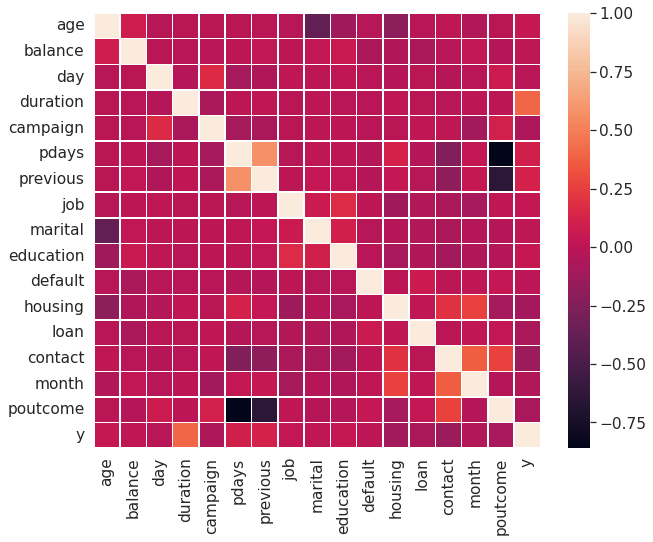

In [76]:
from sklearn.preprocessing import OrdinalEncoder

# select the columns with categorical values
df_cat= df.select_dtypes(include='object')

# implement ordicanl encoder on the categorical columns
OrEn= OrdinalEncoder()
OrEn.fit(df_cat)
df_cat_OrEn=pd.DataFrame(OrEn.transform(df_cat))
df_cat_OrEn.columns=df_cat.columns

# concatenate the encoded columns with numerical columns
df_modify=pd.concat([df.select_dtypes(include='int'),df_cat_OrEn],axis=1)

# plot the correlation between attributes and output
sns.set(rc={"figure.figsize":(10, 8)})
sns.set(font_scale=1.4)
sns.heatmap(df_modify.corr(), annot=False, fmt=".5f",linewidths=.5,xticklabels=True, yticklabels=True );

## Visualize the features

1. Visualize the relationship between "month" and "outcome".



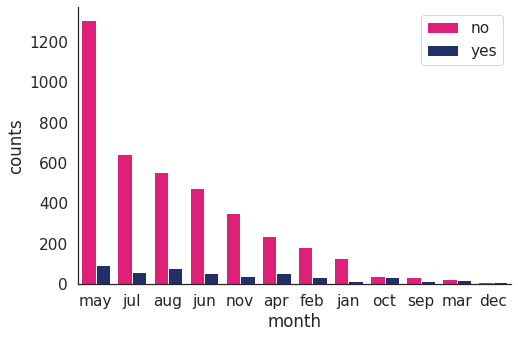

In [77]:
# group the data by "month" and "outcome"
data_1=df.groupby(["month", "y"]).size().reset_index(name='counts')

# visualize the relational plot between "month" and "outcome"
sns.set_style("white")
fig_2 = sns.catplot(x="month", y="counts", hue="y",kind="bar",
      height=5, aspect=1.5, palette=["#FF0075","#172774"],legend=False, 
      data=data_1.sort_values("counts", ascending=False));
plt.legend(loc='upper right');


2. Visualize the relationship between "job" and "outcome".


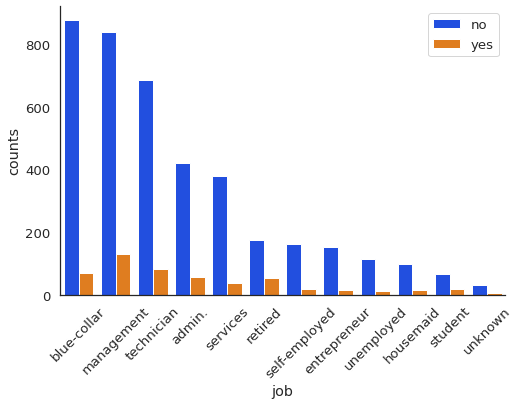

In [78]:
# group the data by "job" and "outcome"
data_1=df.groupby(["job", "y"]).size().reset_index(name='counts')

# visualize the relational plot between "job" and "outcome"
sns.set(font_scale=1.2)
sns.set_style("white")

fig_3= sns.catplot(x="job", y="counts", hue="y",
      kind="bar", height=5, aspect=1.5, palette="bright",legend=False,
      data=data_1.sort_values("counts", ascending=False));
plt.legend(loc='upper right')

#rotate the x labels by 60 degrees
fig_3.set_xticklabels(rotation=45);


3. Visualize the relationship between "day", "duration" ,and "output" .


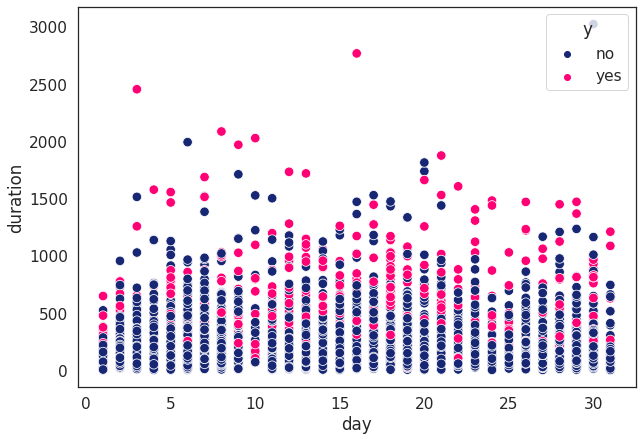

In [79]:
# visualize the relation ship between "day", "duration" ,and "output" 
sns.set(rc={"figure.figsize":(10, 7)})
sns.set(font_scale=1.4)
sns.set_style("white")
sns.scatterplot(x="day", y="duration", hue="y", palette=["#172774","#FF0075"], s=90, data=df);

## Building classification model
In this step, we aim to build a classification model to predict the outcome of each phone call based on the features. The trained model can be used to shortlist the customers in the feature campaigns.

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# separate the features and dependent variable
x = df.loc[:, df.columns != 'y'];
y = df['y'];

# perform the one-hot encoding on categorical features
enc = OneHotEncoder(handle_unknown='ignore');
cat_col=x.select_dtypes(include=["object"]);
enc.fit(cat_col);
enc_cat_col=enc.transform(cat_col);
enc_cat_col=enc_cat_col.toarray()

# concatenate columns with encoded features and numerical features
numeric_col=x.select_dtypes(include=["int"]).to_numpy();
print(type(numeric_col))
x=np.concatenate((enc_cat_col,numeric_col), axis=1)

# split into train and test
y=y.to_numpy();
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = .30, random_state=42)      

# print the shape of train and test arrays
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(3164, 51)
(1357, 51)
(3164,)
(1357,)


In [92]:
# import the models from Scikit-learn library
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# define the SVM, KNN, RF, and MLP models
SVM = SVC(kernel='rbf')
KNN= KNeighborsClassifier(n_neighbors = 2)
RF = RandomForestClassifier(n_estimators=11)
MLP= MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 1), random_state=1)
models=[SVM, KNN,RF,MLP]

# define the dictionary to save the cross validation scores for each model
dic={"Model":[],"Max Score":[],"Min Score":[],"Mean Score":[]}
dic["Model"]=["Support Vector Machine","K-Nearest Neighbors","Random Forest",
              "Multilayer Perceptron"]

# evaluate machine learning models using k-fold cross-validation 
# save cross valdiation scores
for model in models:
  scores = cross_val_score(model, x, y, cv=5)
  dic["Max Score"].append(scores.max()*100)
  dic["Min Score"].append(scores.min()*100)
  dic["Mean Score"].append(scores.mean()*100)


In [93]:
# improt tabulate library
from tabulate import tabulate

# print the cross valdiation scores 
headers=["Model","Max Score","Min Score","Mean Score"]
print("Cross-Validation Results: \n")
print(tabulate(dic,headers))


Cross-Validation Results: 

Model                     Max Score    Min Score    Mean Score
----------------------  -----------  -----------  ------------
Support Vector Machine      88.4956      88.3978       88.476
K-Nearest Neighbors         88.3978      87.1681       87.9672
Random Forest               89.6018      88.7168       89.2059
Multilayer Perceptron       88.4956      88.3978       88.476
